# ESTE PROGRAMA PREDICE LAS EMISIONES DE CO2 DE UN VEHICULO CON UN MODELO DE REGRESION LINEAL

El modelo de regresión lineal mediante OLS (ordinary least squares) tiene la forma:

$$ \hat{y} = \alpha + \beta_{1}*x_{1} + \beta_{2}*x_{2} + ... + \beta_{n}*x_{n} + \varepsilon$$

Donde $\hat{y}$ es la predicción que queremos hacer,

$\alpha$ es el término independiente,

$\beta_{n}$ es un vector de coeficientes
y $x_{n}$ son los valores de las variables del dataset.

El objetivo es obtener $\alpha$ y $\beta_{n}$  tales que error cuadrático (residuo) , definido como:

$$RSS = \varepsilon² = \sum\limits_{i=1}^n(y_{i} - (\alpha - \beta_{i}x_{i}))^2$$

sea el mínimo.

Para ello tenemos que resolver las siguientes equaciones

$$\hat{\alpha} = \bar{y} - \hat{\beta}*\bar{x}$$
$$\hat{\beta} = (X^TX)^{-1}X^Ty$$

# Parametros iniciales:

In [52]:
%load_ext watermark
%watermark

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Last updated: 2023-08-26T16:01:10.833830-06:00

Python implementation: CPython
Python version       : 3.10.12
IPython version      : 8.12.2

Compiler    : GCC 11.2.0
OS          : Linux
Release     : 6.2.0-27-generic
Machine     : x86_64
Processor   : x86_64
CPU cores   : 6
Architecture: 64bit



In [73]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [77]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8,8)
plt.rcParams['font.size'] = 12

# CARGAMOS EL DATASET DE VEHICULOS CANADIENSES:

In [55]:
vehiculos = pd.read_csv("/home/carlostr/curso_data_science-master/archive/CO2 Emissions_Canada.csv",
                       usecols=['Engine Size(L)','Fuel Consumption City (L/100 km)','Fuel Consumption Hwy (L/100 km)','Fuel Consumption Comb (L/100 km)','Cylinders','CO2 Emissions(g/km)'])
                  

In [56]:
vehiculos = pd.DataFrame.fillna(vehiculos,0)

In [83]:
vehiculos.shape

(4136, 7)

In [57]:
vehiculos.head()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244


We drop the duplicates

In [58]:
vehiculos = vehiculos.drop_duplicates()

We delete the outliers

In [65]:
from scipy import stats

def outliers_col(df):
    for columna in df:
        np.object = object    
        if df[columna].dtype != np.object:
            n_outliers = len(df[np.abs(stats.zscore(df[columna])) > 3])    
            print("{} | {} | {}".format(
                df[columna].name,
                n_outliers,
                df[columna].dtype
        ))

outliers_col(vehiculos)

Engine Size(L) | 0 | float64
Cylinders | 0 | int64
Fuel Consumption City (L/100 km) | 10 | float64
Fuel Consumption Hwy (L/100 km) | 26 | float64
Fuel Consumption Comb (L/100 km) | 12 | float64
CO2 Emissions(g/km) | 3 | int64


In [69]:
vehiculos = vehiculos[
    (np.abs(stats.zscore(vehiculos['Fuel Consumption City (L/100 km)'])) < 3)  & \
    (np.abs(stats.zscore(vehiculos['Fuel Consumption Hwy (L/100 km)'])) < 3)  & \
    (np.abs(stats.zscore(vehiculos['Fuel Consumption Comb (L/100 km)'])) < 3)  & \
    (np.abs(stats.zscore(vehiculos['CO2 Emissions(g/km)'])) < 3) & \
    (np.abs(stats.zscore(vehiculos['Engine Size(L)'])) < 3) & \
    (np.abs(stats.zscore(vehiculos['Cylinders'])) < 3) 
]
outliers_col(vehiculos)

Engine Size(L) | 0 | float64
Cylinders | 0 | int64
Fuel Consumption City (L/100 km) | 0 | float64
Fuel Consumption Hwy (L/100 km) | 4 | float64
Fuel Consumption Comb (L/100 km) | 2 | float64
CO2 Emissions(g/km) | 0 | int64


Valores Inexistentes

In [70]:
n_records = len(vehiculos)
def valores_inexistentes_col(df):
    for columna in df:
        print("{} | {} | {}".format(
            df[columna].name, len(df[df[columna].isnull()]) / (1.0*n_records), df[columna].dtype
        ))

valores_inexistentes_col(vehiculos)

Engine Size(L) | 0.0 | float64
Cylinders | 0.0 | int64
Fuel Consumption City (L/100 km) | 0.0 | float64
Fuel Consumption Hwy (L/100 km) | 0.0 | float64
Fuel Consumption Comb (L/100 km) | 0.0 | float64
CO2 Emissions(g/km) | 0.0 | int64


In [71]:
nombre_variable_dependiente = 'CO2 Emissions(g/km)'
nombre_variable_independiente = ['Engine Size(L)','Fuel Consumption City (L/100 km)','Fuel Consumption Hwy (L/100 km)','Fuel Consumption Comb (L/100 km)','Cylinders']

In [75]:
modelo = LinearRegression()
modelo.fit(X=vehiculos[nombre_variable_independiente], y=vehiculos[nombre_variable_dependiente])
vehiculos['co2_pred'] = modelo.predict(vehiculos[nombre_variable_independiente])

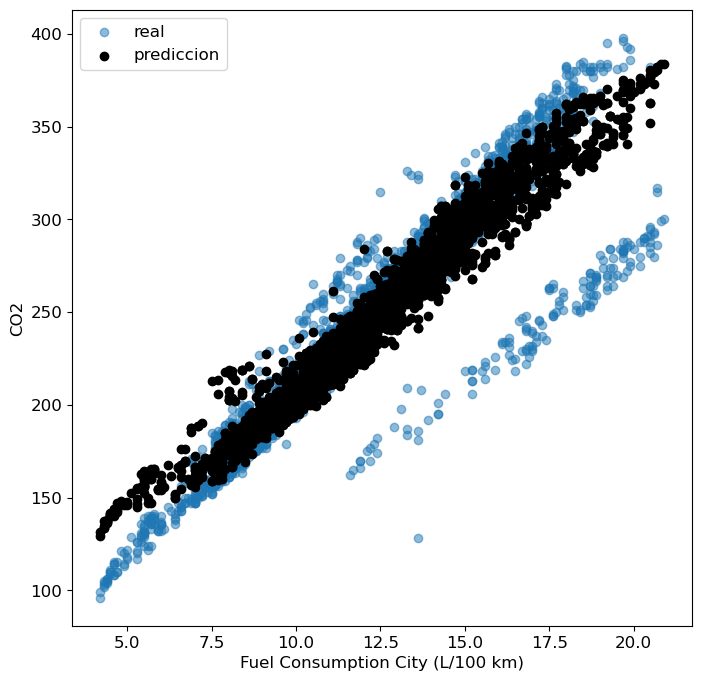

In [78]:
plt.scatter(vehiculos['Fuel Consumption City (L/100 km)'], vehiculos['CO2 Emissions(g/km)'], alpha=0.5, label="real")
plt.scatter(vehiculos['Fuel Consumption City (L/100 km)'],vehiculos.co2_pred, c="black", label="prediccion")
plt.xlabel("Fuel Consumption City (L/100 km)")
plt.ylabel("CO2")
plt.legend();

In [80]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
def rmse_cv(estimator, X, y):
    y_pred = estimator.predict(X)
    return np.sqrt(mean_squared_error(y,y_pred))

def evaluar_modelo(modelo, X, y):
    return cross_val_score(
        estimator = modelo,
        X=X,
        y=y,
        scoring=rmse_cv,
        cv=5
    ).mean()

In [81]:
evaluar_modelo(modelo,X,y)

21.663240597631123